In [1]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Loading the dataset
movie_data = pd.read_csv('movies.csv')
movie_data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [3]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [4]:
#Checking the total number of null values in the dataset for each feature
nulls = movie_data.isnull().sum()
nulls

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

# Data Preprocessing

In [5]:
movie_data['score'] = movie_data['score'].replace(np.nan, 0)
movie_data['votes'] = movie_data['votes'].replace(np.nan, 0)
movie_data['budget'] = movie_data['budget'].replace(np.nan, 0)
movie_data['gross'] = movie_data['gross'].replace(np.nan, 0)
movie_data['runtime'] = movie_data['runtime'].replace(np.nan, 0)
movie_data['rating'] = movie_data['rating'].replace(np.nan, 'unknown')
movie_data['released'] = movie_data['released'].replace(np.nan, 'unknown')
movie_data['writer'] = movie_data['writer'].replace(np.nan, 'unknown')
movie_data['star'] = movie_data['star'].replace(np.nan, 'unknown')
movie_data['country'] = movie_data['country'].replace(np.nan, 'unknown')
movie_data['company'] = movie_data['company'].replace(np.nan, 'unknown')

In [6]:
#There should be 0 null values now
nulls = movie_data.isnull().sum()
nulls

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [7]:
#Converting the data types of categorical variables to int64
dtypes = {'score' : 'int64', 'votes' : 'int64', 'budget' : 'int64', 'gross' : 'int64', 'runtime' : 'int64'}
movie_data = movie_data.astype(dtypes)

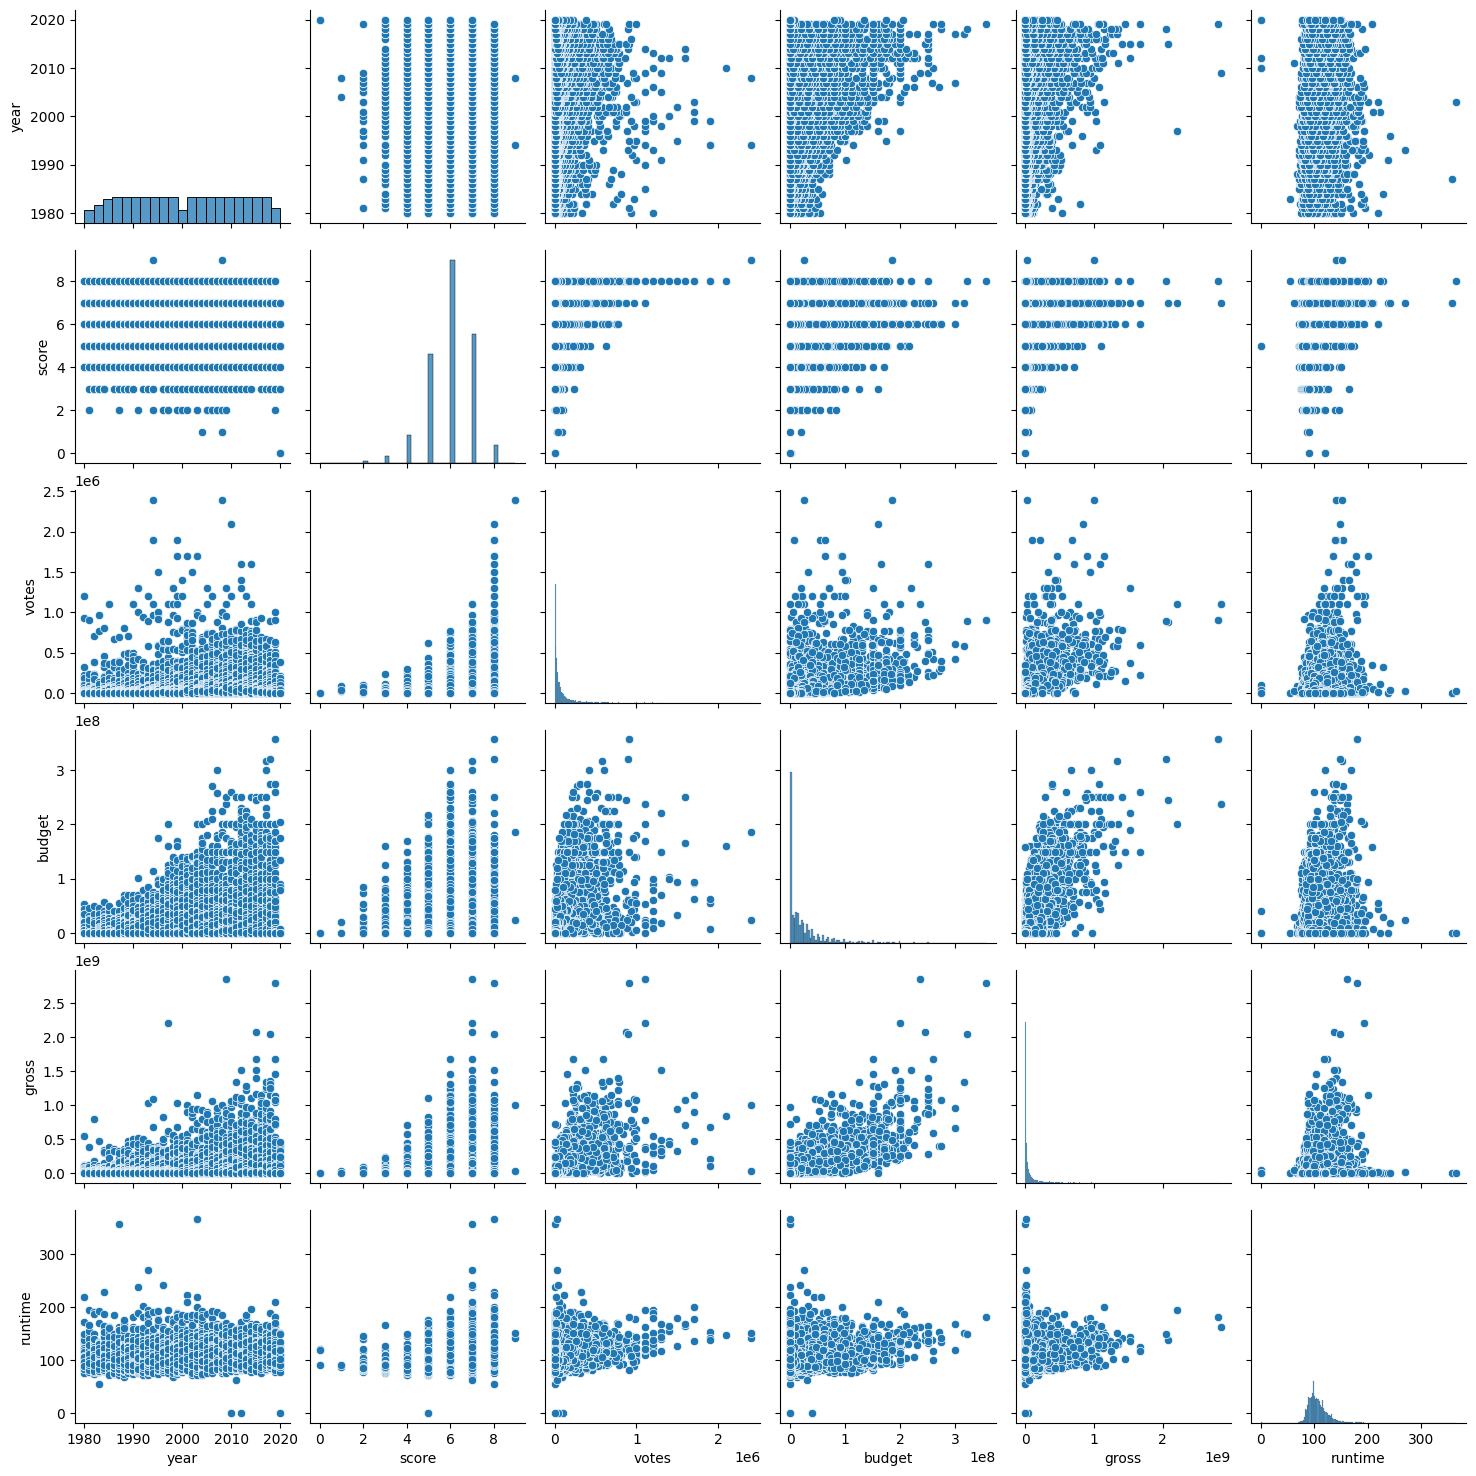

In [8]:
sns.pairplot(movie_data)

In [9]:
movie_data['released'].value_counts()

released
February 14, 1986 (United States)    9
May 17, 2019 (United States)         9
October 4, 1991 (United States)      9
August 9, 2019 (United States)       8
November 6, 1987 (United States)     8
                                    ..
March 9, 2000 (Australia)            1
July 20, 2001 (United Kingdom)       1
October 11, 2000 (France)            1
May 10, 2001 (Australia)             1
August 19, 2020 (United States)      1
Name: count, Length: 3415, dtype: int64

In [ ]:
#Return only the year part of the string in Released variable
def releaseyear(year):
    year = str(year)
    if '(' in year:
        year = year.split('(')[0]
        return year
    else:
        return year
    
